## Classifying DNA Sequences

In [1]:
# Hide warnings
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
# Read Human DNA Sequences
human_data = pd.read_csv('human_data.txt',delimiter = "\t") # Or simply by read_table()
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [4]:
human_data.shape

(4380, 2)

#### Here I will use the human data to train the model. Then we can challenge the model’s generalizability by trying to predict sequence function(class) in other species (the chimpanzee and dog)!!

### Read DNA Sequences of Chimpanzee and Dog!!

In [5]:
chimp_data = pd.read_table('chimp_data.txt')
dog_data = pd.read_table('dog_data.txt')

In [6]:
print(chimp_data.shape)
print(dog_data.shape)

(1682, 2)
(820, 2)


In [7]:
chimp_data.head(5)

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


### Let's understand the Classes (human_data.txt) that represent gene sequence function groups!

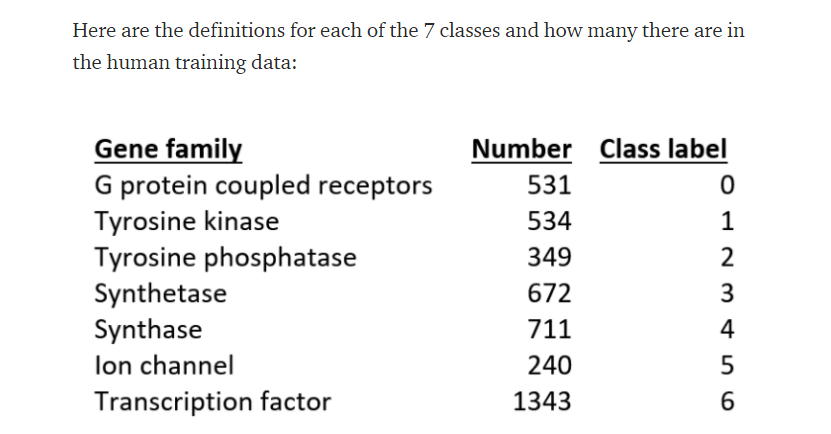

In [8]:
from IPython.display import Image
Image("Classes indicating Gene Families.PNG")

## Encode DNA Sequences!!
Different Techniques available :https://www.kaggle.com/thomasnelson/working-with-dna-sequence-data-for-ml

#### K-mer counting: Treating DNA sequence as a "Language"

A challenge that remains is that none of the previous encoding methods results in vectors of uniform length, and that is a requirement for feeding data to a classification or regression algorithm. So with the previous  methods you have to resort to things like truncating sequences or padding with "n" or "0" to get vectors of uniform length.

#### DNA and protein sequences can be viewed metaphorically as the language of life. The language encodes instructions as well as function for the molecules that are found in all life forms. The sequence language analogy continues with the genome as the book, subsequences (genes and gene families) are sentences and chapters, k-mers and peptides (motifs) are words, and nucleotide bases and amino acids are the alphabet. Since the analogy seems so apt, it stands to reason that the amazing work done in the natural language processing field should also apply to the natural language of DNA and protein sequences.

The method I use here is simple and easy. I first take the long biological sequence and break it down into k-mer length overlapping “words”. For example, if I use "words" of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.

Here I am using hexamer “words” but that is arbitrary and word length can be tuned to suit the particular situation. The word length and amount of overlap need to be determined empirically for any given application.


#### The Function to collect all possible overlapping k-mers of a specified length from any sequence string!

In [9]:
# returns a list of k-mer "words"
def getKmers(sequence, size=6): # Taking word size (tunable) = 6 (hexamer words)
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]   # changing to lowercase

#### Applying K-mer counting on each dataset  using our getKmers()

In [10]:
human_data['K-mer_words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1)  # Now drop the sequence on which we applied K-mer

chimp_data['K-mer_words'] = chimp_data.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp_data = chimp_data.drop('sequence', axis=1)

dog_data['K-mer_words'] = dog_data.apply(lambda x: getKmers(x['sequence']), axis=1)
dog_data = dog_data.drop('sequence', axis=1)

In [11]:
#Let's have a look!
dog_data.head()

,class,K-mer_words
0,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."


In [12]:
# Let's join the K-mer words into a sentence for each sequence !

human_texts = list(human_data['K-mer_words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
    
# Taking the class as labels   
y_human= human_data.iloc[:, 0].values                         

In [13]:
human_texts[1]

'atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaaat aaaatc aaatct aatctg atctgt tctgtt ctgttc tgttcg gttcgc ttcgct tcgctt cgcttc gcttca cttcat ttcatt tcattc cattca attcat ttcatt tcattg cattgc attgcc ttgccc tgcccc gccccc ccccca ccccac cccaca ccacaa cacaat acaatc caatcc aatcct atccta tcctag cctagg ctaggc taggcc aggcct ggccta gcctac cctacc ctaccc tacccg acccgc cccgcc ccgccg cgccgc gccgca ccgcag cgcagt gcagta cagtac agtact gtactg tactga actgat ctgatc tgatca gatcat atcatt tcattc cattct attcta ttctat tctatt ctattt tatttc atttcc tttccc ttcccc tccccc ccccct cccctc ccctct cctcta ctctat tctatt ctattg tattga attgat ttgatc tgatcc gatccc atcccc tcccca ccccac cccacc ccacct cacctc acctcc cctcca ctccaa tccaaa ccaaat caaata aaatat aatatc atatct tatctc atctca tctcat ctcatc tcatca catcaa atcaac tcaaca caacaa aacaac acaacc caaccg aaccga accgac ccgact cgacta gactaa actaat ctaatc taatca aatcac atcacc tcacca caccac accacc ccaccc caccca acccaa cccaac ccaaca caacaa aacaat acaatg caatga aatgac atgact tgacta gacta

In [14]:
y_human

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

#### Let's do  the same steps for chimpanzee and dog !!

In [15]:
# for chimpanzee
chimp_texts = list(chimp_data['K-mer_words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
    
y_chimp = chimp_data.iloc[:, 0].values                      

#for dog
dog_texts = list(dog_data['K-mer_words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
    
y_dog = dog_data.iloc[:, 0].values   

#### Now we will apply the CBOW  using CountVectorizer

In [16]:
# Applying CountVectorizer on the words/vocabularies found from the sequences!
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))

X_human =cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [17]:
# Let's see the vector shapes
print(X_human.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


#### For human we have 4380 genes converted into uniform length feature vectors of 4-gram k-mer (length 6) counts. For chimp and dog, we also have the expected same number of features with 1682 and 820 genes respectively.

#### If we have a look at class balance ,we can see we have relatively balanced dataset!

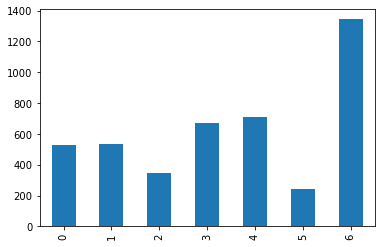

In [42]:
human_data['class'].value_counts().sort_index().plot.bar()

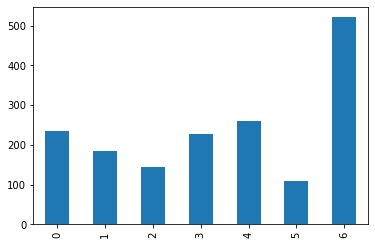

In [46]:
chimp_data['class'].value_counts().sort_index().plot.bar()

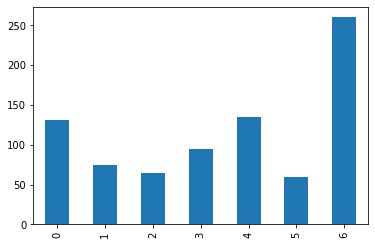

In [47]:
dog_data['class'].value_counts().sort_index().plot.bar()

In [18]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_human, y_human, test_size = 0.2,random_state=40)

In [19]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


## Set a classifier

In [65]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1) ## The alpha parameter was determined by grid search previously!
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [66]:
y_pred = classifier.predict(X_test)
y_pred

array([6, 1, 0, 3, 4, 0, 0, 6, 4, 6, 6, 2, 5, 3, 1, 3, 2, 6, 6, 1, 3, 6,
       3, 6, 6, 4, 6, 4, 3, 4, 6, 6, 0, 6, 1, 6, 6, 6, 6, 6, 3, 0, 3, 5,
       0, 6, 6, 3, 6, 4, 4, 2, 6, 1, 6, 2, 4, 4, 6, 2, 6, 1, 0, 4, 6, 2,
       0, 0, 2, 1, 3, 3, 0, 1, 5, 6, 0, 4, 6, 1, 6, 4, 3, 4, 3, 0, 4, 6,
       1, 0, 4, 3, 4, 3, 3, 3, 0, 6, 1, 0, 0, 2, 1, 4, 6, 6, 4, 6, 1, 4,
       3, 2, 6, 3, 3, 3, 4, 3, 6, 4, 2, 2, 0, 3, 1, 5, 0, 6, 0, 6, 3, 0,
       3, 6, 6, 6, 0, 1, 3, 1, 6, 1, 0, 0, 0, 6, 1, 0, 4, 2, 0, 1, 4, 2,
       1, 6, 1, 6, 4, 6, 4, 6, 6, 4, 0, 6, 0, 5, 6, 3, 4, 1, 6, 6, 1, 4,
       4, 6, 4, 6, 3, 6, 3, 3, 2, 3, 6, 6, 6, 0, 6, 6, 3, 1, 0, 2, 4, 4,
       5, 0, 0, 4, 5, 6, 6, 0, 3, 6, 3, 1, 1, 6, 6, 3, 6, 1, 0, 1, 3, 6,
       6, 4, 0, 6, 6, 0, 0, 1, 0, 6, 3, 6, 1, 4, 6, 1, 3, 3, 2, 4, 4, 4,
       3, 1, 4, 1, 4, 4, 6, 4, 3, 0, 0, 1, 0, 4, 4, 1, 4, 4, 4, 6, 1, 2,
       6, 5, 0, 3, 6, 6, 1, 3, 1, 4, 4, 6, 6, 6, 4, 4, 4, 4, 0, 1, 6, 4,
       4, 6, 5, 0, 1, 4, 2, 3, 1, 1, 3, 3, 6, 6, 6,

## Create model  performance metrics!

In [72]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Confusion Matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual Label'), pd.Series(y_pred, name='Predicted Label')))

def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

print("Accuracy = %.3f \nPrecision = %.3f \nRecall = %.3f \nF1_Score = %.3f" % (accuracy, precision, recall, f1))

Confusion Matrix

Predicted Label    0    1   2    3    4   5    6
Actual Label                                    
0                113    0   0    0    0   0    0
1                  1  115   0    0    0   0    4
2                  0    0  62    0    0   0    3
3                  0    0   0  121    1   0    1
4                  1    0   0    0  149   0    2
5                  2    0   0    0    0  37    1
6                  0    0   0    0    0   0  263
Accuracy = 0.982 
Precision = 0.982 
Recall = 0.982 
F1_Score = 0.982


## Now Let our model try to predict the classes on Chimpanzee & Dog DNA sequences!!

In [73]:
# Chimpanzee
y_pred_chimp = classifier.predict(X_chimp)

In [77]:
y_pred_chimp.shape

(1682,)

In [78]:
# performance on chimpanzee genes
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Confusion Matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual Label'), pd.Series(y_pred, name='Predicted Label')))

def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_chimp, y_pred_chimp)

print("Accuracy = %.3f \nPrecision = %.3f \nRecall = %.3f \nF1_Score = %.3f" % (accuracy, precision, recall, f1))

Confusion Matrix

Predicted Label    0    1   2    3    4   5    6
Actual Label                                    
0                113    0   0    0    0   0    0
1                  1  115   0    0    0   0    4
2                  0    0  62    0    0   0    3
3                  0    0   0  121    1   0    1
4                  1    0   0    0  149   0    2
5                  2    0   0    0    0  37    1
6                  0    0   0    0    0   0  263
Accuracy = 0.991 
Precision = 0.991 
Recall = 0.991 
F1_Score = 0.991


#### The above result was expected because  the human DNA Sequences are very similar to Chimpanzee !!

In [79]:
# For Dog 
y_pred_dog = classifier.predict(X_dog)

In [80]:
y_pred_dog

array([4, 6, 6, 6, 0, 6, 0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 6, 0, 0, 0, 0, 0,
       6, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 0, 3, 3, 6, 6, 6, 6, 4, 0, 4, 4, 2, 0, 0, 0, 0, 6, 0, 6, 0,
       0, 5, 5, 6, 4, 6, 0, 0, 3, 6, 3, 6, 6, 6, 6, 6, 4, 6, 4, 1, 4, 0,
       0, 0, 6, 6, 4, 6, 6, 6, 6, 6, 4, 6, 6, 3, 3, 3, 6, 0, 6, 6, 6, 6,
       4, 4, 5, 6, 6, 1, 5, 6, 6, 1, 4, 2, 6, 3, 3, 6, 6, 6, 6, 6, 6, 6,
       6, 3, 6, 6, 2, 0, 0, 6, 6, 3, 3, 3, 0, 0, 4, 6, 6, 6, 1, 1, 0, 0,
       0, 4, 0, 4, 0, 0, 3, 4, 6, 0, 6, 6, 3, 4, 0, 6, 6, 1, 2, 2, 2, 3,
       6, 2, 2, 2, 6, 0, 0, 6, 6, 0, 0, 1, 6, 5, 5, 6, 0, 6, 0, 0, 4, 0,
       0, 3, 4, 0, 0, 6, 6, 5, 5, 4, 4, 1, 0, 6, 5, 6, 6, 4, 4, 2, 2, 2,
       0, 6, 4, 4, 2, 1, 6, 6, 0, 6, 4, 6, 0, 0, 6, 0, 6, 4, 6, 1, 1, 4,
       6, 4, 4, 6, 0, 3, 2, 2, 6, 6, 3, 3, 4, 3, 0, 3, 5, 5, 6, 6, 5, 5,
       5, 2, 2, 4, 4, 6, 4, 4, 6, 6, 6, 6, 3, 3, 4, 3, 0, 0, 6, 0, 0, 6,
       6, 1, 0, 6, 0, 0, 6, 6, 1, 1, 1, 4, 2, 2, 3,

In [81]:
# performance on Dog genes
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Confusion Matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual Label'), pd.Series(y_pred, name='Predicted Label')))

accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)

print("Accuracy = %.3f \nPrecision = %.3f \nRecall = %.3f \nF1_Score = %.3f" % (accuracy, precision, recall, f1))

Confusion Matrix

Predicted Label    0    1   2    3    4   5    6
Actual Label                                    
0                113    0   0    0    0   0    0
1                  1  115   0    0    0   0    4
2                  0    0  62    0    0   0    3
3                  0    0   0  121    1   0    1
4                  1    0   0    0  149   0    2
5                  2    0   0    0    0  37    1
6                  0    0   0    0    0   0  263
Accuracy = 0.918 
Precision = 0.928 
Recall = 0.918 
F1_Score = 0.918


### The model seems to produce good results on human data. It also does on Chimpanzee which is because the Chimpanzee and humans share the same genetic hierarchy. The performance on the dog is not quite as good which is because the dog is more divergent from humans than the chimpanzee!

For More : https://medium.com/analytics-vidhya/demystify-dna-sequencing-with-machine-learning-and-python-bdbaeb177f56